In [82]:
import pandas as pd 
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns
#CSV CLIENTES
df_clientes = pd.read_excel('csv/Contactos.xlsx')

#CSV POBREZA
df_pobreza = pd.read_csv("csv/df_pobreza_dep.csv", sep=',', encoding='utf-8', low_memory=False)

#CSV PELEGRIDAD
df_peligro = pd.read_csv("csv/df_peligro_dep.csv", sep=',', encoding='utf-8', low_memory=False)

#Normalizaciones
def normalizar_textos(s):
    if pd.isna(s):
        return ""  # manejo nulos
    s = str(s).strip()  # convierto a string
    s = s.lower()
    # Quitar acentos
    s = "".join(
        c for c in unicodedata.normalize("NFD", s)
        if unicodedata.category(c) != "Mn"
    )
    # Quitar espacios dobles
    s = " ".join(s.split())
    # Quitar puntos y comas al inicio/final
    s = s.strip(".,")
    return s

df_clientes["Localidad"] = df_clientes["Localidad"].apply(
    lambda x: "" if pd.isna(x) else str(x).lower().strip()
)

df_clientes['departamento_nombre'] = df_clientes['Localidad'].apply(normalizar_textos)
df_clientes['provincia_nombre'] = df_clientes['Provincia'].apply(normalizar_textos)
""" 
['' 'mendoza' 'cordoba' 'buenosaires' 'santafe' 'catamarca' 'neuquen'
 'tucuman' 'salta' 'rionegro' 'lapampa' 'sanluis' 'larioja' 'chubut'
 'sanjuan' 'santiagodelestero' 'corrientes' 'chaco']
"""
provincias = {
    'buenosaires': 'buenos aires',
    'santafe': 'santa fe',
    'rionegro': 'rio negro',
    'lapampa': 'la pampa',
    'sanluis': 'san luis',
    'larioja': 'la rioja',
    'sanjuan': 'san juan',
    'santiagodelestero': 'santiago del estero'
}
df_clientes['provincia_nombre'] = df_clientes['provincia_nombre'].replace(provincias)

cantidad_ventas_localidad = df_clientes.groupby(['departamento_nombre', 'provincia_nombre']).size()

cantidad_ventas_localidad = cantidad_ventas_localidad.reset_index()

cantidad_ventas_localidad.columns = ['departamento_nombre','provincia_nombre','cantidad_ventas']



#Mergeamos todos los DF
df_matriz = pd.merge(df_pobreza, df_peligro, on=['departamento_nombre', 'provincia_nombre'])
df_matriz = pd.merge(df_matriz, cantidad_ventas_localidad, on=['departamento_nombre', 'provincia_nombre'])


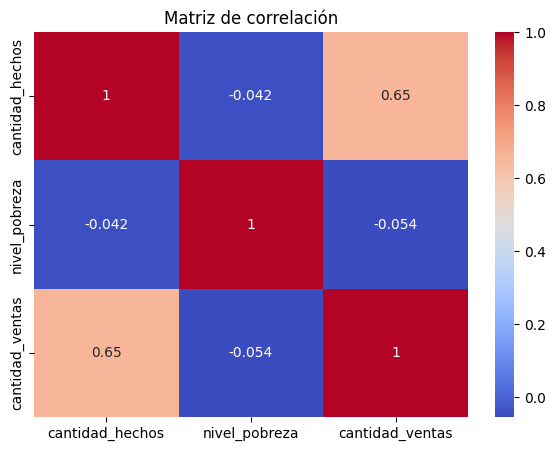

In [87]:
df_agrupado = df_matriz.groupby(['departamento_nombre','provincia_nombre']).agg({
    'cantidad_hechos': 'sum',
    'nivel_pobreza': 'mean',
    'cantidad_ventas': 'sum'
}).reset_index()


columnas_matriz = ['cantidad_hechos', 'nivel_pobreza', 'cantidad_ventas']

matriz_correlacion = df_matriz[columnas_matriz].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm")
plt.title('Matriz de correlación')
plt.show()

   Departamento Nivel de incidencia de pobreza crónica Provincia  Población  \
73   Guaymallen                   Moderado (5 - 9,99%)   Mendoza     281686   

   departamento_nombre provincia_nombre  nivel_pobreza  anio  cantidad_hechos  \
73          guaymallen          mendoza            7.5  2024             7863   

    cantidad_ventas  
73               32  


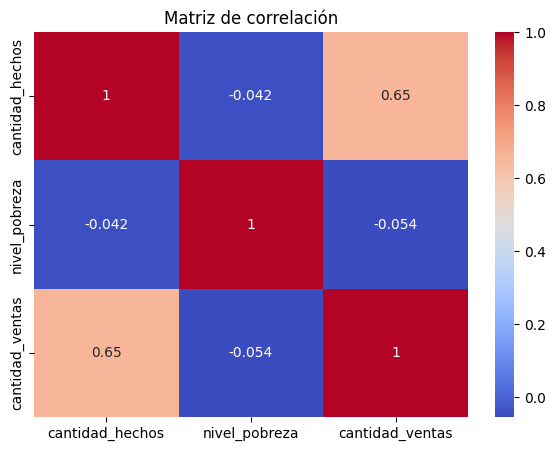

In [ ]:
provincia = 'mendoza'
departamento = 'guaymallen'
df_matriz_final = df_matriz[(df_matriz['provincia_nombre'] == provincia) & (df_matriz['departamento_nombre'] == departamento)]
print(df_matriz_final)


columnas_matriz = ['cantidad_hechos', 'nivel_pobreza', 'cantidad_ventas']

matriz_correlacion = df_matriz_final[columnas_matriz].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm")
plt.title('Matriz de correlación')
plt.show()